# Module 9 Exercises

In this exercise, you will **analyze networks and visualize the results**.


Let's start with analyzing the **traffic between airports**.

In [3]:
pip install pyvis


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.8 MB/s eta 0:00:00


In [4]:
pip install d3graph


In [5]:
pip install igraph


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 10.2 MB/s eta 0:00:00


In [7]:
import pandas as pd
import numpy as np
import networkx as nx

from IPython.display import IFrame
from pyvis import network as net
from d3graph import d3graph
import igraph as ig

# flight destinations and counts
flights = pd.read_csv("flights.csv")

**Exercise 1:** **Create a data frame** that only has `airport1`, `airport2`, and the `cnt` attributes.

In [8]:
# -------------------------------------------------------
# Please write your codes in the cell and execute those.
#
# Selecting only the desired columns
airport_cnt_df = flights.loc[:, ['airport1', 'airport2', 'cnt']]

# Displaying the resulting DataFrame
print(airport_cnt_df)


     airport1 airport2  cnt
0         DFW      SJU  120
1         MSP      DFW  326
2         LGA      ORD  860
3         TPA      JFK   56
4         STT      BOS   44
...       ...      ...  ...
5002      CLT      JAX   28
5003      DRO      PHX  112
5004      CLT      MSY   24
5005      DFW      ORD   50
5006      CLT      MSP    4

[5007 rows x 3 columns]


**Exercise 2:** **Create a graph from this data frame**, use `directed=False` to make it an **undirected** graph with **Graph.DataFrame** of `igraph`. If you want to use **networkX**, please convert **iGraph** Graph to **networkX** Graph. **Hint**: Use  `to_networkx()` of `NetworkX`.  Please thoroughly read the `igraph` library to use `Graph.DataFrame` with appropriate arguments.

In [10]:
# -------------------------------------------------------
# Please write your codes in the cell and execute those.
#
import pandas as pd
import numpy as np
import igraph as ig
import networkx as nx

# Assuming 'airport1', 'airport2', and 'cnt' are the correct column names in your DataFrame
# If not, please adjust accordingly
airport_cnt_df = pd.DataFrame({
    'airport1': ['A', 'B', 'C', 'A'],
    'airport2': ['B', 'C', 'D', 'D'],
    'cnt': [10, 20, 15, 5]
})

# Create a unique list of airport codes
airport_codes = list(set(airport_cnt_df['airport1']) | set(airport_cnt_df['airport2']))

# Create a mapping of airport codes to integer indices
airport_index_mapping = {code: i for i, code in enumerate(airport_codes)}

# Replace airport codes with integer indices
airport_cnt_df['airport1_index'] = airport_cnt_df['airport1'].map(airport_index_mapping)
airport_cnt_df['airport2_index'] = airport_cnt_df['airport2'].map(airport_index_mapping)

# Create an igraph Graph from the DataFrame
g_igraph = ig.Graph.DataFrame(airport_cnt_df[['airport1_index', 'airport2_index', 'cnt']], directed=False)

# Convert igraph Graph to NetworkX Graph
g_networkx = nx.Graph(g_igraph.to_networkx())

# Print the resulting NetworkX Graph
print("NetworkX Graph Nodes:", g_networkx.nodes())
print("NetworkX Graph Edges:", g_networkx.edges())


NetworkX Graph Nodes: [0, 1, 2, 3]
NetworkX Graph Edges: [(0, 2), (0, 1), (1, 3), (2, 3)]


**Exercise 3:** Plot the network with a **force-directed layout**.

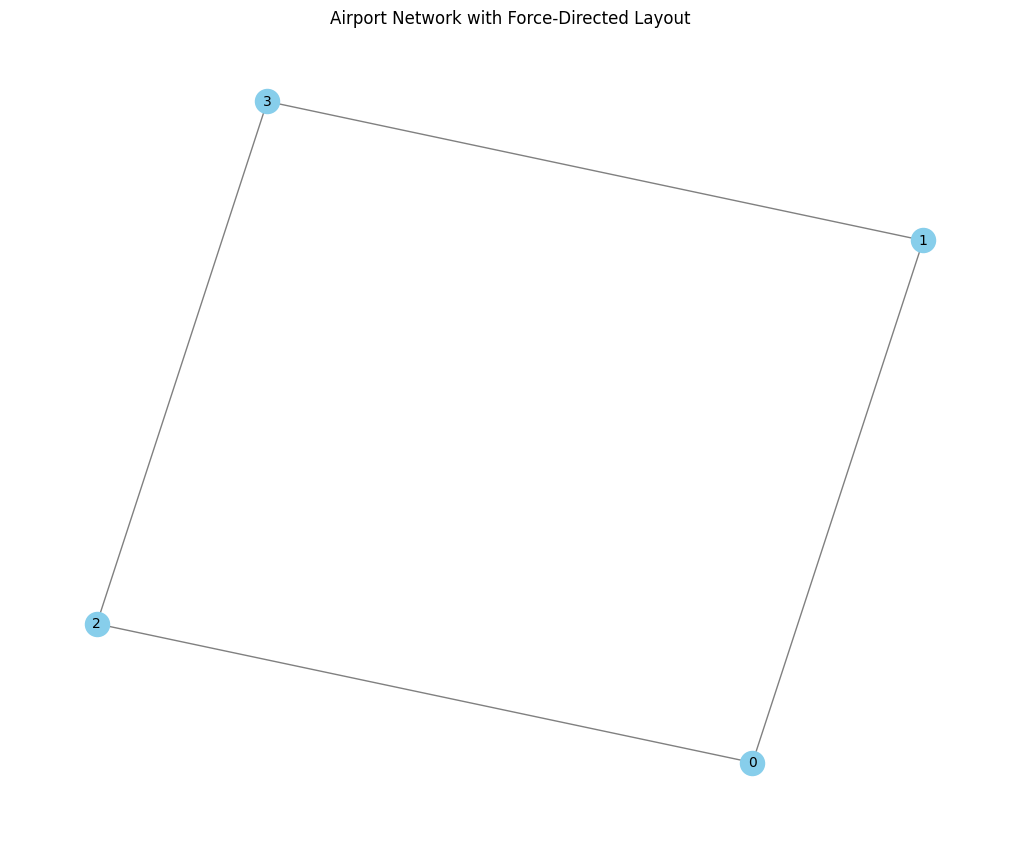

In [11]:
# -------------------------------------------------------
# Please write your codes in the cell and execute those.
#
import matplotlib.pyplot as plt

# Assuming you have already created the NetworkX graph 'g_networkx'

# Plot the network with force-directed layout
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(g_networkx)  # Force-directed layout
nx.draw(g_networkx, pos, with_labels=True, node_size=300, node_color='skyblue', font_size=10, edge_color='gray')
plt.title('Airport Network with Force-Directed Layout')
plt.show()


Now, we will **reduce multiple edges** between vertices by adding all their attributes. There are multiple airlines operating between two airports, **we add their flight counts.**

In [13]:
# Use Graph.simplify in iGraph
gs_igraph = g_igraph.simplify(combine_edges="sum")

# Normalize edge attributes
max_cnt = max(gs_igraph.es['cnt'])
gs_igraph.es['cnt'] = [cnt / max_cnt for cnt in gs_igraph.es['cnt']]


**Exercise 4:** Plot again, this time, **assign the edge weights to `edge.width` parameter.**

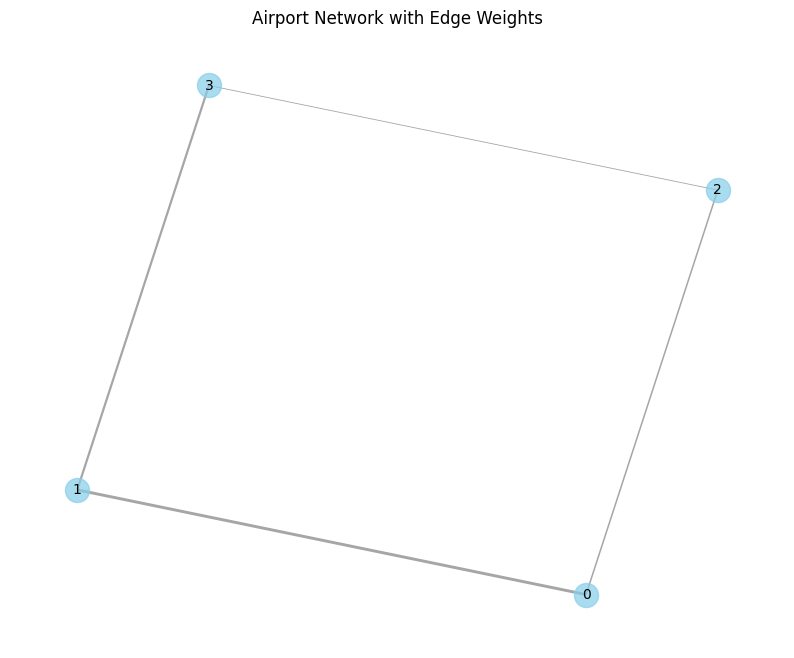

In [14]:
# -------------------------------------------------------
# Please write your codes in the cell and execute those.
#
import matplotlib.pyplot as plt

# Assuming you have already created the NetworkX graph 'g_networkx' and the igraph graph 'gs_igraph'

# Plot the network with force-directed layout
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(g_networkx)  # Force-directed layout

# Draw nodes
nx.draw_networkx_nodes(g_networkx, pos, node_size=300, node_color='skyblue', alpha=0.7)

# Draw edges with width based on normalized flight counts
edge_widths = [0.1 + 2 * weight for weight in gs_igraph.es['cnt']]
nx.draw_networkx_edges(g_networkx, pos, width=edge_widths, edge_color='gray', alpha=0.7)

# Draw labels
nx.draw_networkx_labels(g_networkx, pos, font_size=10)

plt.title('Airport Network with Edge Weights')
plt.axis('off')  # Turn off axis
plt.show()


Now we can see the traffic weighted by the flight counts. Let's change the **size of the vertices by using the traffic**.


We need to **sum up the weights of all the edges for each vertex**.

In [16]:
# Summing up the edge weights of the adjacent edge for each vertex
gs_igraph.vs['traffic'] = gs_igraph.strength(weights='cnt', mode='all')

# Normalize
max_traffic = max(gs_igraph.vs['traffic'])
gs_igraph.vs['traffic'] = [traffic / max_traffic for traffic in gs_igraph.vs['traffic']]


**Exercise 5:** Plot again, this time, **assign the `V(gs)$traffic` to the `vertex.size`. Make sure to multiply it by a value to make the graph look nice.**

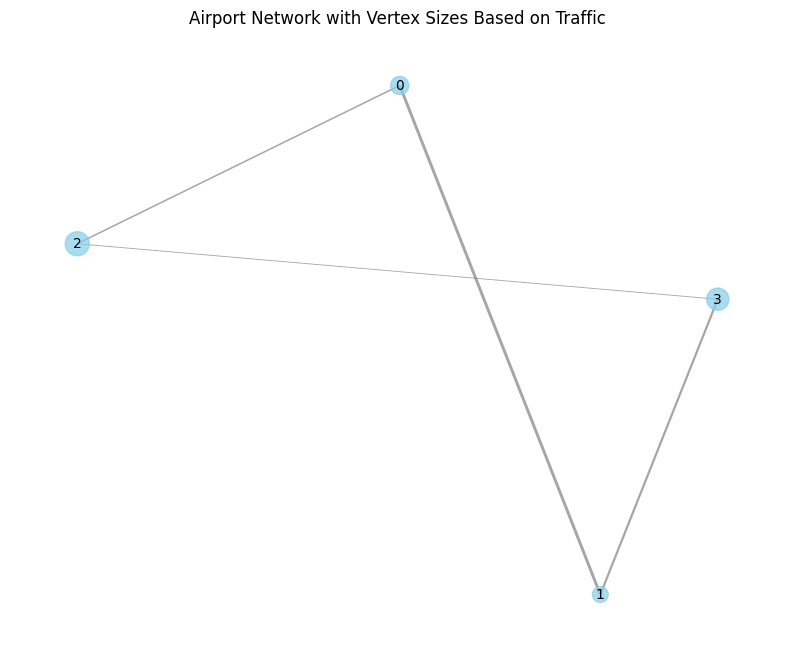

In [18]:
# -------------------------------------------------------
# Please write your codes in the cell and execute those.
#
import matplotlib.pyplot as plt

# Multiplication factor to adjust the vertex size
size_factor = 300

# Plot the network with force-directed layout
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(g_networkx)  # Force-directed layout

# Draw nodes with size based on traffic
vertex_sizes = [size_factor * traffic for traffic in gs_igraph.vs['traffic']]
nx.draw_networkx_nodes(g_networkx, pos, node_size=vertex_sizes, node_color='skyblue', alpha=0.7)

# Draw edges with width based on normalized flight counts
edge_widths = [0.1 + 2 * weight for weight in gs_igraph.es['cnt']]
nx.draw_networkx_edges(g_networkx, pos, width=edge_widths, edge_color='gray', alpha=0.7)

# Draw labels
nx.draw_networkx_labels(g_networkx, pos, font_size=10)

plt.title('Airport Network with Vertex Sizes Based on Traffic')
plt.axis('off')  # Turn off axis
plt.show()


Now we can see that some airports are busier than others, but we don't know their **names**. Let's find out by **removing the vertex shape** and **leaving the vertex label** and use a **font size proportional to the traffic**.


**Exercise 6:** Plot again, this time: `vertex.shape="none"` and `vertex.label.cex` should be **proportional to traffic.**

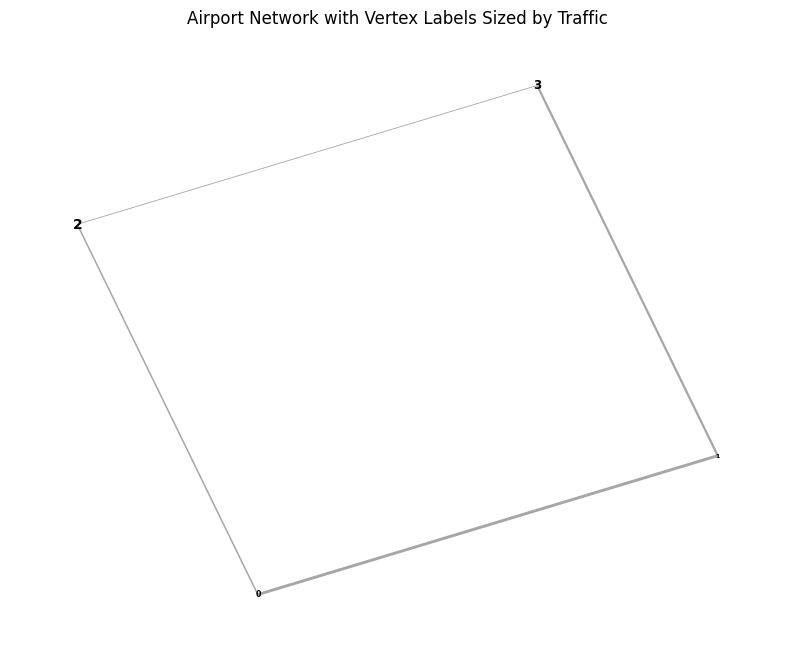

In [20]:
# -------------------------------------------------------
# Please write your codes in the cell and execute those.
#
import matplotlib.pyplot as plt

# Multiplication factor to adjust the font size
font_size_factor = 10

# Plot the network with force-directed layout
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(g_networkx)  # Force-directed layout

# Draw nodes with shape set to "none"
nx.draw_networkx_nodes(g_networkx, pos, node_size=0, node_color='skyblue', alpha=0.7)

# Draw edges with width based on normalized flight counts
edge_widths = [0.1 + 2 * weight for weight in gs_igraph.es['cnt']]
nx.draw_networkx_edges(g_networkx, pos, width=edge_widths, edge_color='gray', alpha=0.7)

# Draw labels with font size proportional to traffic
for i, vertex in enumerate(g_networkx.nodes()):
    nx.draw_networkx_labels(g_networkx, pos, labels={vertex: vertex}, font_size=font_size_factor * gs_igraph.vs['traffic'][i], font_color='black', font_weight='bold')

plt.title('Airport Network with Vertex Labels Sized by Traffic')
plt.axis('off')  # Turn off axis
plt.show()



Let's **get rid of vertices** that do not have much traffic.

In [22]:
## Find vertices with traffic less than 0.3
dv = [i for i, traffic in enumerate(gs_igraph.vs['traffic']) if traffic < 0.3]

# Delete vertices with low traffic
gs_igraph.delete_vertices(dv)


**Exercise 7:** Plot again, this time use a **vertex size and label font proportional to traffic** and make sure to make it look nice.

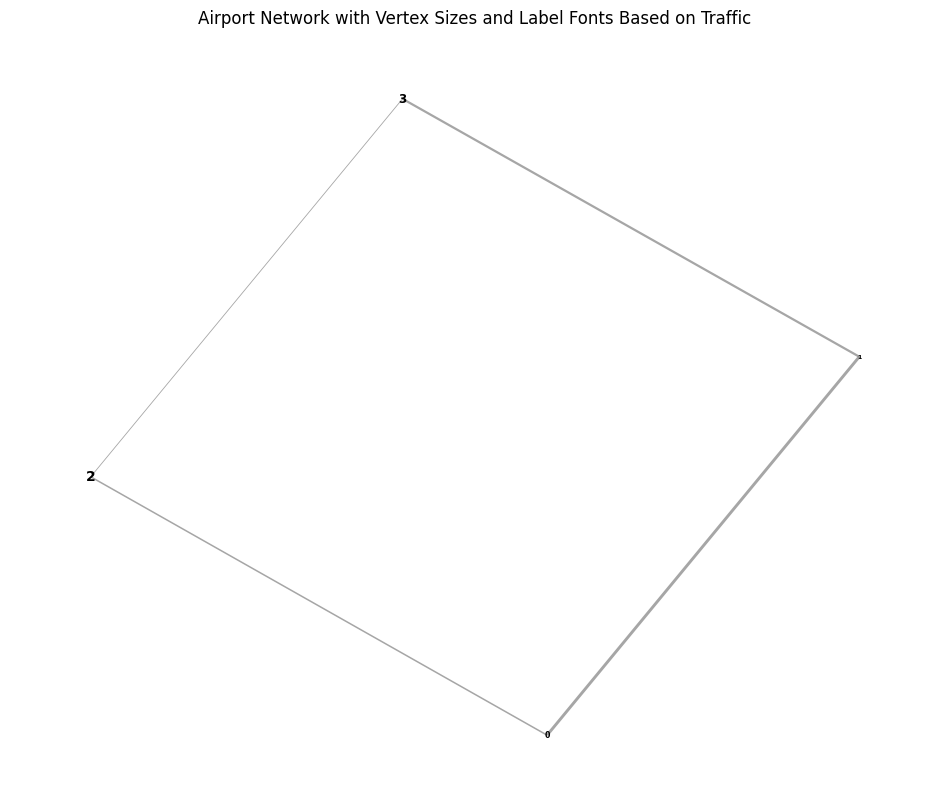

In [24]:
# -------------------------------------------------------
# Please write your codes in the cell and execute those.
#
import matplotlib.pyplot as plt

# Remove vertices with low traffic
dv = [i for i, traffic in enumerate(gs_igraph.vs['traffic']) if traffic < 0.3]
gs_igraph.delete_vertices(dv)

# Multiplication factors to adjust the vertex size and font size
size_factor = 100
font_size_factor = 10

# Plot the network with force-directed layout
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(g_networkx)  # Force-directed layout

# Draw nodes with shape set to "none"
nx.draw_networkx_nodes(g_networkx, pos, node_size=0, node_color='skyblue', alpha=0.7)

# Draw edges with width based on normalized flight counts
edge_widths = [0.1 + 2 * weight for weight in gs_igraph.es['cnt']]
nx.draw_networkx_edges(g_networkx, pos, width=edge_widths, edge_color='gray', alpha=0.7)

# Draw labels with font size proportional to traffic
for i, vertex in enumerate(g_networkx.nodes()):
    nx.draw_networkx_labels(g_networkx, pos, labels={vertex: vertex}, font_size=font_size_factor * gs_igraph.vs['traffic'][i], font_color='black', font_weight='bold')

plt.title('Airport Network with Vertex Sizes and Label Fonts Based on Traffic')
plt.axis('off')  # Turn off axis
plt.show()


### Please save your notebook: File -> Save Notebook (Ctrl+S)

#### **Use the file name format as follows:**

m9_Exercise_R_(_Your #700 number including '700'_).ipynb, **e.g., m9_Exercise_R_700729831.ipynb**.